In [1]:
import itertools
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors

# Classification

In [2]:
train_set = pd.read_csv("./spam_train.csv")
test_set = pd.read_csv("./spam_test.csv")

In [3]:
X_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["class"])
X_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["class"])

## KNN

In [4]:
accuracies_test = []
accuracies_train = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions_test = knn.predict(X_test)
    predictions_train = knn.predict(X_train) 
    accuracies_test.append(np.round(np.sum(predictions_test==y_test)*100/len(y_test), 2))
    accuracies_train.append(np.round(np.sum(predictions_train==y_train)*100/len(y_train), 2))

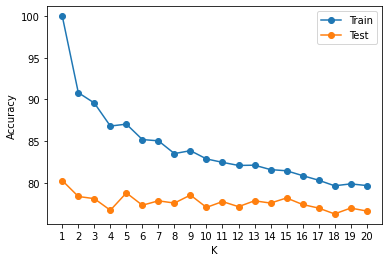

In [5]:
plt.plot(np.arange(1,21),accuracies_train, marker="o", label="Train")
plt.plot(np.arange(1,21),accuracies_test, marker="o", label = "Test")
_ = plt.xticks(np.arange(1,21))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()

### ANALYSIS of Misclassified

In [6]:
optimal_k = 5
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
# Indices of misclassified samples
misclassified_indices = np.where((y_pred!=y_test))[0]
misclassified_indices

array([   0,    2,    8,    9,   11,   14,   22,   24,   29,   32,   36,
         46,   51,   52,   53,   60,   66,   67,   69,   71,   73,   75,
         87,   90,   93,   94,   98,  101,  117,  124,  137,  141,  146,
        148,  154,  155,  157,  162,  173,  196,  202,  205,  206,  207,
        211,  216,  221,  225,  235,  237,  241,  245,  252,  268,  269,
        271,  275,  279,  285,  289,  293,  295,  296,  297,  298,  303,
        304,  308,  309,  311,  321,  325,  328,  331,  337,  342,  349,
        354,  369,  370,  374,  380,  382,  395,  397,  398,  410,  413,
        417,  420,  423,  426,  430,  431,  440,  444,  450,  451,  455,
        457,  483,  487,  488,  491,  493,  496,  499,  509,  510,  518,
        522,  526,  532,  540,  542,  558,  561,  563,  576,  578,  590,
        595,  601,  609,  612,  627,  629,  640,  644,  645,  656,  657,
        681,  683,  686,  688,  693,  696,  697,  710,  715,  717,  719,
        720,  734,  744,  754,  756,  757,  760,  7

In [8]:
#Identify k nearest neighbors from the training set for each misclassified test sample
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [9]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)

In [10]:
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,0,0,1,2757,1,2.81,922,1,3.38,1155,1,3.44
1,2,1,0,2084,0,2.62,86,1,2.85,1093,1,2.85
2,8,1,0,2378,1,2.25,811,0,3.15,2824,0,3.17
3,9,0,1,909,1,5.23,2690,0,5.53,3301,1,6.42
4,11,1,0,3221,1,0.00,1162,0,4.97,3139,0,5.28
...,...,...,...,...,...,...,...,...,...,...,...,...
239,1129,1,0,1207,1,3.02,3174,0,4.64,2744,0,5.86
240,1134,1,0,499,0,9.12,3078,1,10.20,1056,0,12.19
241,1137,1,0,1588,1,2.00,1854,1,5.21,360,0,7.20
242,1139,0,1,1735,0,3.16,2483,1,6.24,865,1,6.42


In [11]:
idx = 243 #between 0 and 243
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], y_train[indices[idx,i]], distances[idx, i]))

Test sample 1147 is misclassified.
True class: 1
Predicted class: 0
Neighbor#1: Train index 331 ; True Class 0 ; Distance 4.91
Neighbor#2: Train index 3047 ; True Class 1 ; Distance 4.99
Neighbor#3: Train index 153 ; True Class 0 ; Distance 5.14


## Logistic Regression

In [12]:
accuracies_test = []
accuracies_train = []
c_vals = [0.1,1.0,2.0,3.0,4.0,5.0]
for i in c_vals:
    clf = LogisticRegression(random_state=0, C=i, solver = "liblinear").fit(X_train, y_train)
    accuracies_test.append(100*clf.score(X_test, y_test))
    accuracies_train.append(100*clf.score(X_train, y_train))

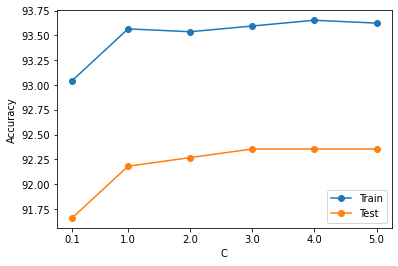

In [13]:
plt.plot(c_vals,accuracies_train, marker="o", label="Train")
plt.plot(c_vals,accuracies_test, marker="o", label = "Test")
_ = plt.xticks(c_vals)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()

### ANALYSIS of Misclassified

In [14]:
optimal_C = 1.0
clf = LogisticRegression(random_state=0, C=i, solver = "liblinear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [15]:
# Indices of misclassified samples
misclassified_indices = np.where((y_pred!=y_test))[0]

In [16]:
#Identify k nearest neighbors from the training set for each misclassified test sample
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [17]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)

In [18]:
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,22,1,0,3181,1,4.17,3440,0,4.40,1792,0,4.41
1,26,1,0,3415,0,4.56,3054,1,5.01,2961,0,11.85
2,32,1,0,935,0,2.04,3177,0,2.09,2100,1,2.39
3,52,1,0,2233,1,0.55,2747,0,2.46,3417,1,3.30
4,53,1,0,2147,0,4.96,1391,0,7.80,1990,0,8.55
...,...,...,...,...,...,...,...,...,...,...,...,...
83,1120,0,1,3120,0,5.42,1034,1,5.90,1097,0,6.06
84,1125,1,0,2598,1,1.01,12,1,5.19,2918,0,5.42
85,1131,1,0,1580,0,3.00,3131,1,5.23,386,0,5.29
86,1141,1,0,62,1,0.00,631,1,0.00,1734,1,0.00


In [19]:
idx = 1 #between 0 and 87
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], y_train[indices[idx,i]], distances[idx, i]))

Test sample 26 is misclassified.
True class: 1
Predicted class: 0
Neighbor#1: Train index 3415 ; True Class 0 ; Distance 4.56
Neighbor#2: Train index 3054 ; True Class 1 ; Distance 5.01
Neighbor#3: Train index 2961 ; True Class 0 ; Distance 11.85


## Linear Support Vector Machines Classifier

In [20]:
accuracies_test = []
accuracies_train = []
c_vals = [0.1,1.0,5.0, 10.0, 15.0, 20.0]
for i in c_vals:
#     clf = make_pipeline(StandardScaler(), SVC(gamma='auto', C=i)).fit(X_train, y_train)
    clf =  SVC(gamma='auto', C=i).fit(X_train, y_train)
    accuracies_test.append(100*clf.score(X_test, y_test))
    accuracies_train.append(100*clf.score(X_train, y_train))

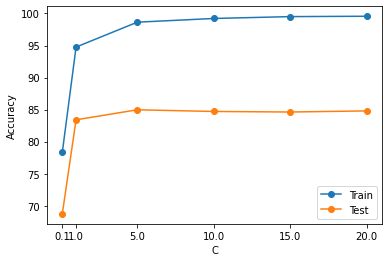

In [21]:
plt.plot(c_vals,accuracies_train, marker="o", label="Train")
plt.plot(c_vals,accuracies_test, marker="o", label = "Test")
_ = plt.xticks(c_vals)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()

In [22]:
optimal_C = 5.0
clf = SVC(gamma='auto', C=i)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
# Indices of misclassified samples
misclassified_indices = np.where((y_pred!=y_test))[0]

In [24]:
#Identify k nearest neighbors from the training set for each misclassified test sample
k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

In [25]:
columns = ["Misclassified Test idx", "True Class", "Pred Class"]
for i in range(k):
    columns+= ["Neigbor#{}_idx".format(i+1), "Neigbor#{}_True Class".format(i+1), "Neigbor#{}_Distance".format(i+1)]

df = pd.DataFrame(columns = columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] =  y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]
for i in range(k):
    df["Neigbor#{}_idx".format(i+1)] = indices[:,i]
    df["Neigbor#{}_True Class".format(i+1)] = y_train[indices[:,i]]
    df["Neigbor#{}_Distance".format(i+1)] = np.around(distances[:,i], decimals=2)

In [26]:
df

,Misclassified Test idx,True Class,Pred Class,Neigbor#1_idx,Neigbor#1_True Class,Neigbor#1_Distance,Neigbor#2_idx,Neigbor#2_True Class,Neigbor#2_Distance,Neigbor#3_idx,Neigbor#3_True Class,Neigbor#3_Distance
0,0,0,1,2757,1,2.81,922,1,3.38,1155,1,3.44
1,8,1,0,2378,1,2.25,811,0,3.15,2824,0,3.17
2,17,0,1,1306,1,5.52,1794,0,16.29,1753,0,20.37
3,22,1,0,3181,1,4.17,3440,0,4.40,1792,0,4.41
4,24,1,0,123,1,3.54,3040,0,3.71,1059,0,4.43
...,...,...,...,...,...,...,...,...,...,...,...,...
170,1126,1,0,2640,0,3.91,895,0,5.28,3082,1,6.41
171,1127,0,1,2133,0,9.18,1393,1,9.29,2722,1,11.15
172,1131,1,0,1580,0,3.00,3131,1,5.23,386,0,5.29
173,1134,1,0,499,0,9.12,3078,1,10.20,1056,0,12.19


In [27]:
idx = 3 #between 0 and 89
print("Test sample {} is misclassified.".format(misclassified_indices[idx]))
print("True class: {}".format(y_test[misclassified_indices][idx]))
print("Predicted class: {}".format(y_pred[misclassified_indices][idx]))
for i in range(k):
    print("Neighbor#{}: Train index {} ; True Class {} ; Distance {:.2f}".format(i+1, indices[idx,i], y_train[indices[idx,i]], distances[idx, i]))

Test sample 22 is misclassified.
True class: 1
Predicted class: 0
Neighbor#1: Train index 3181 ; True Class 1 ; Distance 4.17
Neighbor#2: Train index 3440 ; True Class 0 ; Distance 4.40
Neighbor#3: Train index 1792 ; True Class 0 ; Distance 4.41
